In [1]:
import numpy as np
import h5py

import matplotlib.pyplot as plt
%matplotlib inline

/home/zenith/miniconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# open the HDF5 file, generated previously, with `read` access.
h5_file_train = h5py.File('data/train_all_classes.h5', 'r')

# get the h5py.Dataset representing all images (256x256)
dset_imgs = h5_file_train['imgs']
print("dset_imgs.shape : {}".format(dset_imgs.shape))

dset_imgs.shape : (15713, 256, 256, 3)


CPU times: user 57.9 s, sys: 1.47 s, total: 59.3 s
Wall time: 1min 5s


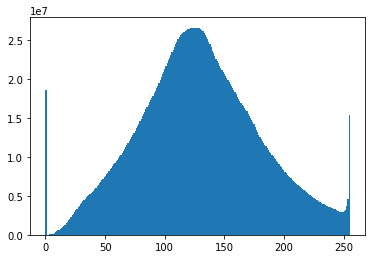

In [3]:
%%time
# plot pixel histogram
_ = plt.hist(dset_imgs[:].flatten(), bins=256)

In [4]:
%%time
# compute mean of RBG channels (over the training set)
# I compute channnel by channel, due to numerical error when I compute mean_rgb directly
# mean_rgb = np.mean(dset_imgs[:], axis=(0,1,2), dtype=np.float32)
mean_r = np.mean(dset_imgs[:,:,:,0], dtype=np.float32)
mean_g = np.mean(dset_imgs[:,:,:,1], dtype=np.float32)
mean_b = np.mean(dset_imgs[:,:,:,2], dtype=np.float32)

mean_rgb = np.asarray([mean_r, mean_g, mean_b], dtype=np.float32)
print(mean_rgb)

[133.84023 128.91234 124.34674]
CPU times: user 5min 47s, sys: 1.15 s, total: 5min 48s
Wall time: 5min 49s


In [5]:
np.save("mean_rgb.npy", mean_rgb)